### Exercícios de Modelos Não Supervisionados de Machine Learning

In [96]:
# Instalando os pacotes
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install plotly
# pip install scipy
# pip install scikit-learn
# pip install pingouin
# pip install prince

In [97]:
# Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px
import prince
from scipy.stats import chi2_contingency
from sklearn.metrics import silhouette_score

#### 1 - Importando o banco de dados

In [98]:
# Importando o banco de dados

clientes = pd.read_excel('clientes_segmenta.xlsx')
clientes

,Gender,EverMarried,Age,Graduated,SpendingScore,FamilySize
0,Male,No,22,No,Low,4.0
1,Female,Yes,38,Yes,Average,3.0
2,Female,Yes,67,Yes,Low,1.0
3,Male,Yes,67,Yes,High,2.0
4,Female,Yes,40,Yes,High,6.0
...,...,...,...,...,...,...
8063,Male,No,22,No,Low,7.0
8064,Male,No,35,No,Low,4.0
8065,Female,No,33,Yes,Low,1.0
8066,Female,No,27,Yes,Low,4.0


#### 2 - Analizando o dataset clientes

##### 2.1 - Estatísticas gerais do banco de dados

In [99]:
clientes.info()
## Note que há valores faltantes "nan"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         8068 non-null   object 
 1   EverMarried    7928 non-null   object 
 2   Age            8068 non-null   int64  
 3   Graduated      7990 non-null   object 
 4   SpendingScore  8068 non-null   object 
 5   FamilySize     7733 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 378.3+ KB


#### 2.2 - Removendo as observações com valores faltantes

In [100]:
clientes.dropna(inplace=True)

##### 2.23 - Estatísticas gerais do banco de dados

In [101]:
# Novas informações sobre o dataset
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7538 entries, 0 to 8067
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         7538 non-null   object 
 1   EverMarried    7538 non-null   object 
 2   Age            7538 non-null   int64  
 3   Graduated      7538 non-null   object 
 4   SpendingScore  7538 non-null   object 
 5   FamilySize     7538 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 412.2+ KB


#### 3 - Clusterização das variáveis quantitativas

##### 3.1 - Separando somente as variáveis quantitativas do banco de dados

In [102]:
#%% Vamos iniciar realizando a clusterização nas variáveis quantitativas

# Separando somente as variáveis quantitativas do banco de dados
df_quanti = clientes[['Age', 'FamilySize']]
df_quanti

,Age,FamilySize
0,22,4.0
1,38,3.0
2,67,1.0
3,67,2.0
4,40,6.0
...,...,...
8063,22,7.0
8064,35,4.0
8065,33,1.0
8066,27,4.0


##### 3.2 - SEstatísticas descritivas das variáveis

In [103]:
# Estatísticas descritivas das variáveis
df_quanti.describe()

,Age,FamilySize
count,7538.000000,7538.000000
mean,43.524144,2.845450
std,16.612202,1.527899
min,18.000000,1.000000
25%,31.000000,2.000000
50%,41.000000,3.000000
75%,53.000000,4.000000
max,89.000000,9.000000


##### 3.3 - Realizando a padronização por meio do Z-Score

In [104]:
# As variáveis estão em unidades de medidas distintas
df_quanti_pad = df_quanti.apply(zscore, ddof=1)
df_quanti_pad

,Age,FamilySize
0,-1.295683,0.755646
1,-0.332535,0.101152
2,1.413169,-1.207835
3,1.413169,-0.553341
4,-0.212142,2.064632
...,...,...
8063,-1.295683,2.719126
8064,-0.513125,0.755646
8065,-0.633519,-1.207835
8066,-0.994699,0.755646


##### 3.4 - Identificando a Quantidade de Cluster

##### 3.4.1 - Identificação da quantidade de clusters (Método Elbow)

In [105]:
elbow = []
K = range(1,11) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(df_quanti_pad)
    elbow.append(kmeanElbow.inertia_)

elbow

[15073.999999999993,
 8929.790281891834,
 5431.330961546813,
 4301.781763275009,
 3239.5258287493766,
 2706.8989913093974,
 2338.6351666100136,
 2077.938556374668,
 1879.5949324237426,
 1701.6141930589392]

<Figure size 9600x4800 with 0 Axes>

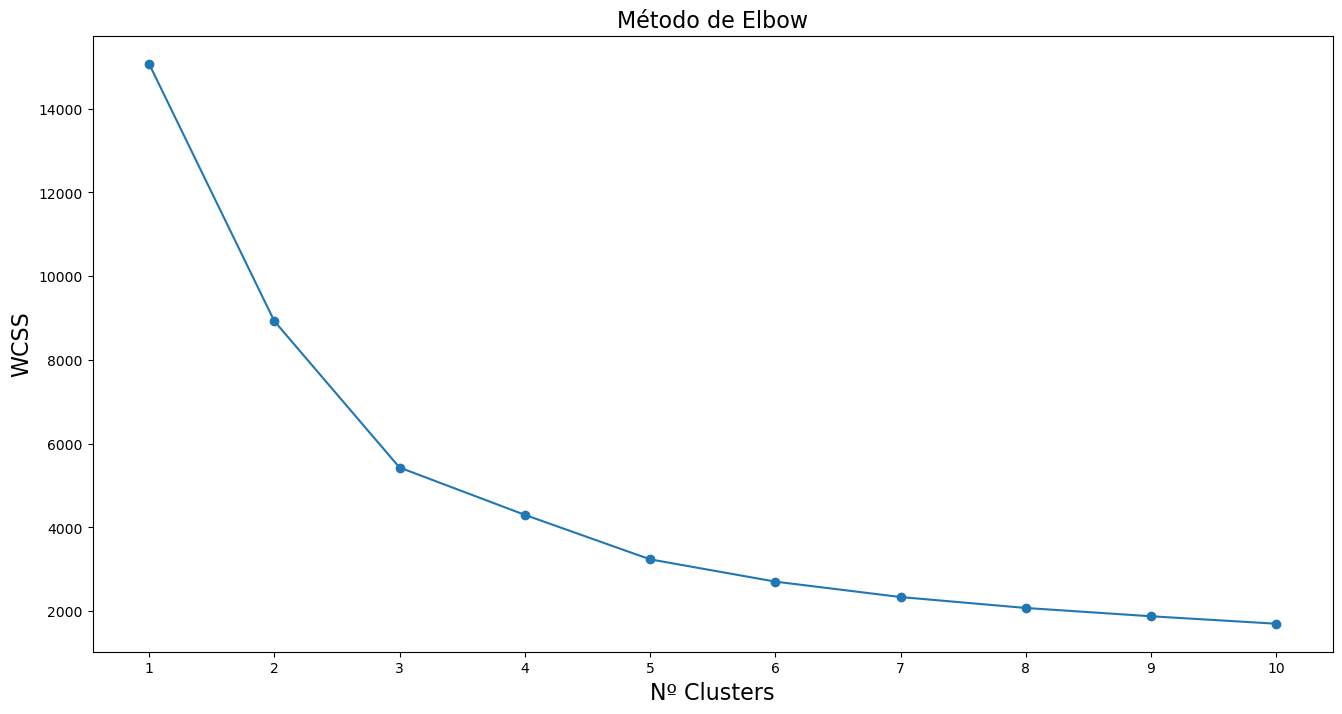

In [106]:
plt.figure(figsize=(16,8), dpi=600)
plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11)) # ajustar de acordo com o range de K definido acima
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

##### 3.4.2 - Identificação da quantidade de clusters (Método da Silhueta)

In [107]:
silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(df_quanti_pad)
    silhueta.append(silhouette_score(df_quanti_pad, kmeansSil.labels_))

silhueta

[0.3697089103798201,
 0.4161793287387505,
 0.3904606127076997,
 0.4232836451912323,
 0.3968203150334176,
 0.3865197742003764,
 0.38687009690264157,
 0.38479047990598475,
 0.41498190525549605]

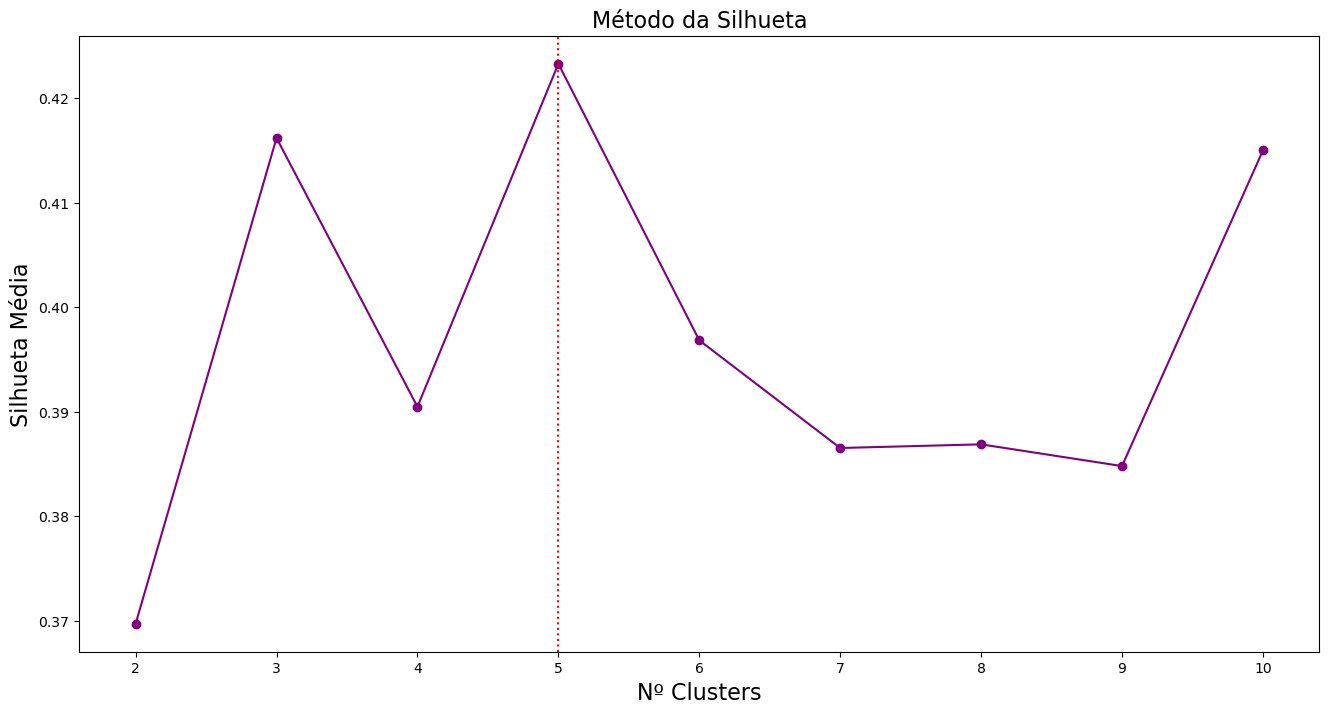

In [108]:
plt.figure(figsize=(16,8))
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()

#### 3.5 - Gerando a Clusterização

In [109]:
# Vamos considerar 5 clusters, dadas as evidências anteriores!
kmeans_final = KMeans(n_clusters = 5, init = 'random', random_state=100).fit(df_quanti_pad)
kmeans_final

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'random'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",100
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


#### 3.6 - Gerando a variável para identificarmos os clusters gerados

In [110]:
kmeans_clusters = kmeans_final.labels_
kmeans_clusters

array([3, 3, 1, ..., 2, 3, 3], dtype=int32)

##### 3.6.1 - Gerando a variável(category) para identificarmos os clusters na base "Clientes"

In [111]:
# Gerando a variável para identificarmos os clusters gerados
clientes['Cluster'] = kmeans_clusters
clientes['Cluster'] = clientes['Cluster'].astype('category')

clientes

,Gender,EverMarried,Age,Graduated,SpendingScore,FamilySize,Cluster
0,Male,No,22,No,Low,4.0,3
1,Female,Yes,38,Yes,Average,3.0,3
2,Female,Yes,67,Yes,Low,1.0,1
3,Male,Yes,67,Yes,High,2.0,1
4,Female,Yes,40,Yes,High,6.0,0
...,...,...,...,...,...,...,...
8063,Male,No,22,No,Low,7.0,0
8064,Male,No,35,No,Low,4.0,3
8065,Female,No,33,Yes,Low,1.0,2
8066,Female,No,27,Yes,Low,4.0,3


##### 3.6.2 - Gerando a variável(category) para identificarmos os clusters na base "df_quanti_pad"

In [112]:
# Gerando a variável para identificarmos os clusters gerados
df_quanti_pad['Cluster'] = kmeans_clusters
df_quanti_pad['Cluster'] = df_quanti_pad['Cluster'].astype('category')

df_quanti_pad

,Age,FamilySize,Cluster
0,-1.295683,0.755646,3
1,-0.332535,0.101152,3
2,1.413169,-1.207835,1
3,1.413169,-0.553341,1
4,-0.212142,2.064632,0
...,...,...,...
8063,-1.295683,2.719126,0
8064,-0.513125,0.755646,3
8065,-0.633519,-1.207835,2
8066,-0.994699,0.755646,3


##### 3.6.3 - Analisando se as duas variáveis são significativas para a clusterização 

In [113]:
# Analisando se as duas variáveis são significativas para a clusterização 

# Age
pg.anova(dv='Age', 
         between='Cluster', 
         data=df_quanti_pad,
         detailed=True).T

###### Analizando o P-unc=0, entendemos que a variavel é relevante.

,0,1
Source,Cluster,Within
SS,5741.233311,1795.766689
DF,4,7533
MS,1435.308328,0.238387
F,6020.925602,NaN
p-unc,0.0,NaN
np2,0.76174,NaN


In [114]:
# Family Size
pg.anova(dv='FamilySize', 
         between='Cluster', 
         data=df_quanti_pad,
         detailed=True).T

###### Analizando o P-unc=0, entendemos que a variavel é relevante.

,0,1
Source,Cluster,Within
SS,6093.24086,1443.75914
DF,4,7533
MS,1523.310215,0.191658
F,7948.068021,NaN
p-unc,0.0,NaN
np2,0.808444,NaN


##### 3.6.4 - Quais são as características dos clusters em termos de idade e família

In [115]:
#%% Quais são as características dos clusters em termos de idade e família

clientes[['Age', 'FamilySize', 'Cluster']].groupby(by=['Cluster']).mean()

/var/folders/_k/czpv9cw53033_40mpyc98h8r0000gn/T/ipykernel_57423/1766039534.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Age,FamilySize
Cluster,,
0,30.911765,5.870844
1,70.043575,1.790990
2,38.561439,1.592158
3,28.436681,3.435434
4,51.387170,3.763774


#### 4 - Vamos realizar uma Analise de Correspondencia Multipla "ACM" nas variáveis qualitativas (incluir os clusters!)

#### 4.1 - Separando somente as variáveis categóricas do banco de dados

In [116]:
df_quali = clientes[['Gender', 'EverMarried', 'Graduated', 'SpendingScore', 'Cluster']]
df_quali

,Gender,EverMarried,Graduated,SpendingScore,Cluster
0,Male,No,No,Low,3
1,Female,Yes,Yes,Average,3
2,Female,Yes,Yes,Low,1
3,Male,Yes,Yes,High,1
4,Female,Yes,Yes,High,0
...,...,...,...,...,...
8063,Male,No,No,Low,0
8064,Male,No,No,Low,3
8065,Female,No,Yes,Low,2
8066,Female,No,Yes,Low,3


#### 4.2 - Estatísticas descritivas univariadas

In [117]:
# Tabelas de frequências por variável
print('---------------------------------------')
print(df_quali.Gender.value_counts())
print('---------------------------------------')
print(df_quali.EverMarried.value_counts())
print('---------------------------------------')
print(df_quali.Graduated.value_counts())
print('---------------------------------------')
print(df_quali.SpendingScore.value_counts())
print('---------------------------------------')
print(df_quali.Cluster.value_counts())
print('---------------------------------------')

---------------------------------------
Gender
Male      4163
Female    3375
Name: count, dtype: int64
---------------------------------------
EverMarried
Yes    4466
No     3072
Name: count, dtype: int64
---------------------------------------
Graduated
Yes    4731
No     2807
Name: count, dtype: int64
---------------------------------------
SpendingScore
Low        4504
Average    1888
High       1146
Name: count, dtype: int64
---------------------------------------
Cluster
2    2474
3    1603
1    1354
4    1325
0     782
Name: count, dtype: int64
---------------------------------------


#### 4.3 - Testes qui-quadrado para pares de variáveis
###### É a aplicação do teste qui-quadrado de independência para avaliar se duas variáveis categóricas estão associadas, como o valor é proximo de zero, temos associaçoes significativa

In [118]:
# Vamos colocar como referência 'SpendingScore'
print('------------------------------------------------------------')
tabela1 = chi2_contingency(pd.crosstab(df_quali["SpendingScore"],
                                       df_quali["Gender"]))
print(f"p-valor da estatística: {round(tabela1[1], 4)}")
print('------------------------------------------------------------')
tabela2 = chi2_contingency(pd.crosstab(df_quali["SpendingScore"], 
                                       df_quali["EverMarried"]))
print(f"p-valor da estatística: {round(tabela2[1], 4)}")
print('------------------------------------------------------------')
tabela3 = chi2_contingency(pd.crosstab(df_quali["SpendingScore"], 
                                       df_quali["Graduated"]))
print(f"p-valor da estatística: {round(tabela3[1], 4)}")
print('------------------------------------------------------------')
tabela4 = chi2_contingency(pd.crosstab(df_quali["SpendingScore"], 
                                       df_quali["Cluster"]))
print(f"p-valor da estatística: {round(tabela4[1], 4)}")
print('------------------------------------------------------------')
# Todas apresentam associação significativa com pelo menos uma variável


------------------------------------------------------------
p-valor da estatística: 0.0
------------------------------------------------------------
p-valor da estatística: 0.0
------------------------------------------------------------
p-valor da estatística: 0.0
------------------------------------------------------------
p-valor da estatística: 0.0
------------------------------------------------------------


##### 4.4 -  Elaborando a análise de correspondência múltipla

In [119]:
#%% Elaborando a análise de correspondência múltipla

# Criando coordenadas para 3 dimensões (a seguir, verifica-se a viabilidade)
mca = prince.MCA(n_components=3).fit(df_quali)

#%% Analisando os resultados

# Análise dos autovalores
tabela_autovalores = mca.eigenvalues_summary
print(tabela_autovalores)

# Inércia total da análise
print(mca.total_inertia_)

# Plotar apenas dimensões com inércia parcial superior à inércia total média
quant_dim = mca.J_ - mca.K_
print(mca.total_inertia_/quant_dim)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.442        24.55%                     24.55%
1              0.270        15.00%                     39.55%
2              0.238        13.21%                     52.76%
1.7999999999999885
0.19999999999999873


#### 4.4 - Obtendo as coordenadas-padrão das categorias das variáveis

In [68]:
#%% Obtendo as coordenadas-padrão das categorias das variáveis

coord_padrao = mca.column_coordinates(df_quali)/np.sqrt(mca.eigenvalues_)
print(coord_padrao)

                               0         1         2
Gender__Female         -0.236523 -0.653927 -0.737880
Gender__Male            0.191753  0.530147  0.598209
EverMarried__No        -1.601284 -0.162705 -0.041124
EverMarried__Yes        1.101465  0.111919  0.028288
Graduated__No          -0.763391  1.381075  0.861258
Graduated__Yes          0.452936 -0.819420 -0.511002
SpendingScore__Average  1.424467 -1.121419  1.835795
SpendingScore__High     1.610741  2.433804 -1.707910
SpendingScore__Low     -1.006950 -0.149178 -0.334973
Cluster__0             -1.224921  1.311033  1.123103
Cluster__1              1.163937  1.913665 -2.508373
Cluster__2             -0.259283 -1.936697 -0.950453
Cluster__3             -1.387804  0.956657  1.135373
Cluster__4              1.696630 -0.270539  2.301501


In [120]:
#%% Plotando o mapa perceptual (coordenadas-padrão)

# Primeiro passo: gerar um DataFrame detalhado

chart = coord_padrao.reset_index()
var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

nome_categ=[]
for col in df_quali:
    nome_categ.append(df_quali[col].sort_values(ascending=True).unique())
    categorias = pd.DataFrame(nome_categ).stack().reset_index()

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'obs_z': chart[2],
                             'variavel': var_chart,
                             'categoria_id': categorias[0]})

# Segundo passo: gerar o gráfico de pontos

fig = px.scatter_3d(chart_df_mca, 
                    x='obs_x', 
                    y='obs_y', 
                    z='obs_z',
                    color='variavel',
                    text=chart_df_mca.categoria_id)

fig.write_html('segmenta.html')

#%% Fim!

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

